In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import json
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
from scipy import stats as st
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.graphics.api import abline_plot
import patsy
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('data.csv')

In [3]:
names = data['Unnamed: 0']

In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
print names
names = ['1 MetroTech', 'Chinatown', 'Bobst Library', 'Union Square', 'Museum of     \n Natural History', 'Avenue U', 'Bensonhurst', 'Brighton Beach']

0      One MetroTech Center
1    Chinatown Canal Street
2             Bobst Library
3              Union Square
4         Central Park West
5                  Avenue U
6             Dyker Heights
7            Brighton Beach
Name: Unnamed: 0, dtype: object


In [6]:
data

,Tweets,Yelp_Food,Yelp_Education,Yelp_Shopping,Yelp_NightLife,Yelp_Restaurant,Cell_Phones,TurnStile,Parking_Tickets,Buses,Census,LEHD
0,923,82,47,191,20,115,16733,12906,367,36,39127,119607
1,22630,319,139,822,64,473,67505,27743,462,32,47184,86081
2,6446,225,106,642,143,471,11233,8305,231,26,32781,48421
3,5540,316,110,603,136,530,10536,7829,532,34,30380,13652
4,1828,18,40,82,5,16,45997,15621,357,24,41837,21521
5,55,22,26,49,3,29,6292,3412,20,8,9365,5382
6,36,22,35,42,3,19,7068,3067,13,10,8571,3585
7,49,44,30,74,6,60,36027,10659,23,8,33405,3011


## Correlating everything vs everything

C:\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


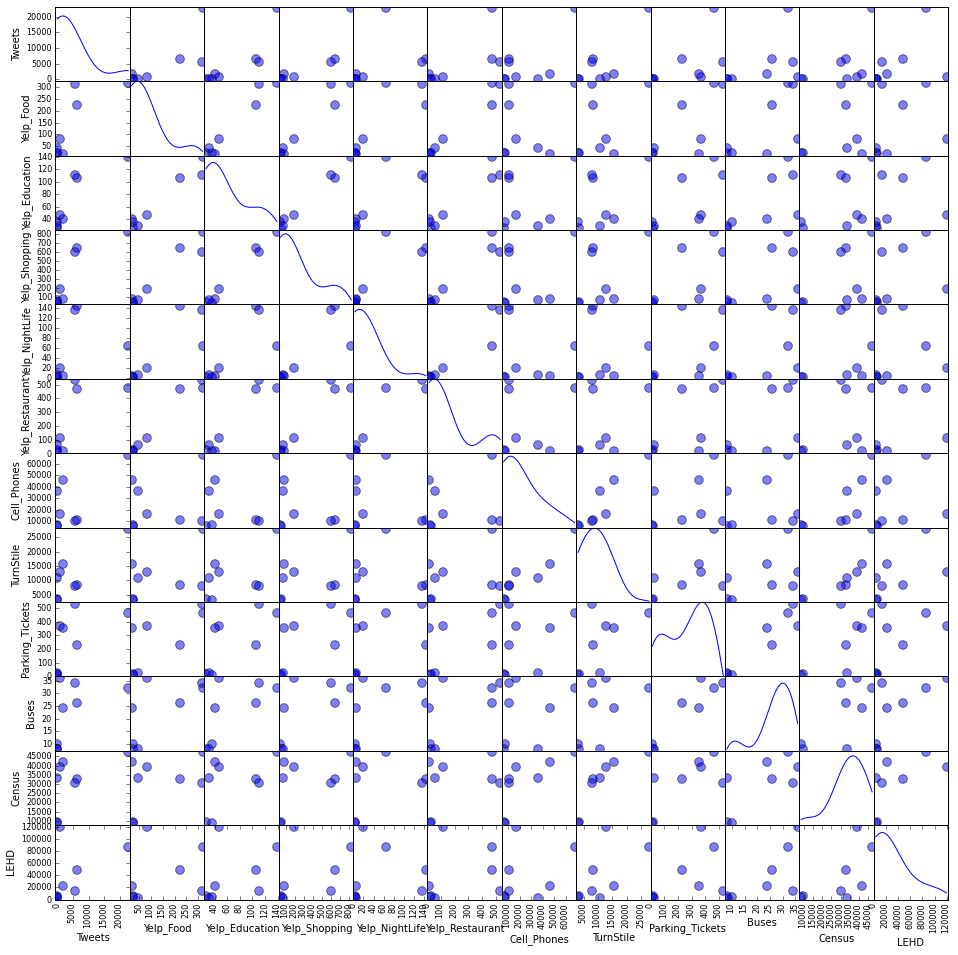

In [7]:
plot = scatter_matrix (data, s=300, figsize=(16, 16), diagonal='kde')

Intercept (alpha) =  15902.9271758 , t score for intercept (alpha) =  2.1201582794
Slope = (beta) 1.97743308166 , t score for slope (beta) =  2.26122229439

MODEL Tweets

                            OLS Regression Results                            
Dep. Variable:            Cell_Phones   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.113
Date:                Mon, 14 Mar 2016   Prob (F-statistic):             0.0644
Time:                        02:51:46   Log-Likelihood:                -88.481
No. Observations:                   8   AIC:                             181.0
Df Residuals:                       6   BIC:                             181.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err       

C:\Anaconda2\lib\site-packages\scipy\stats\stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


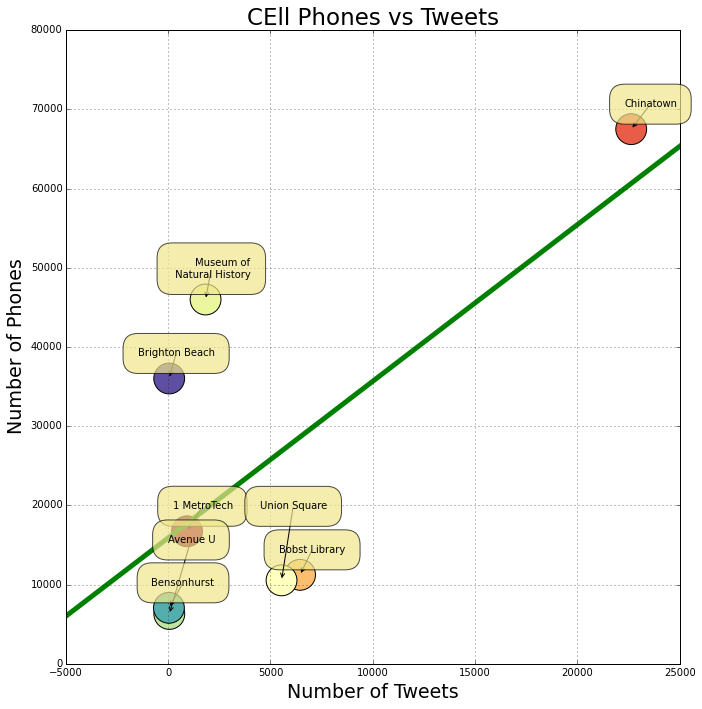

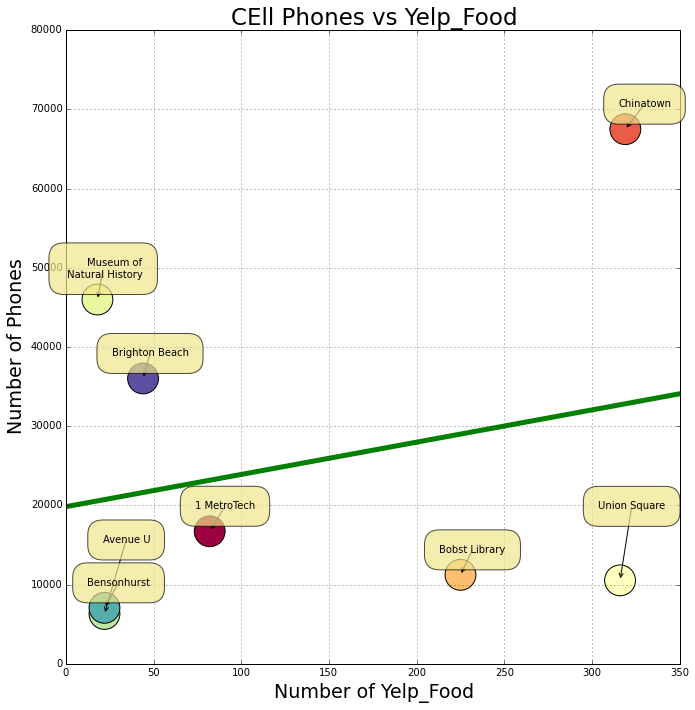

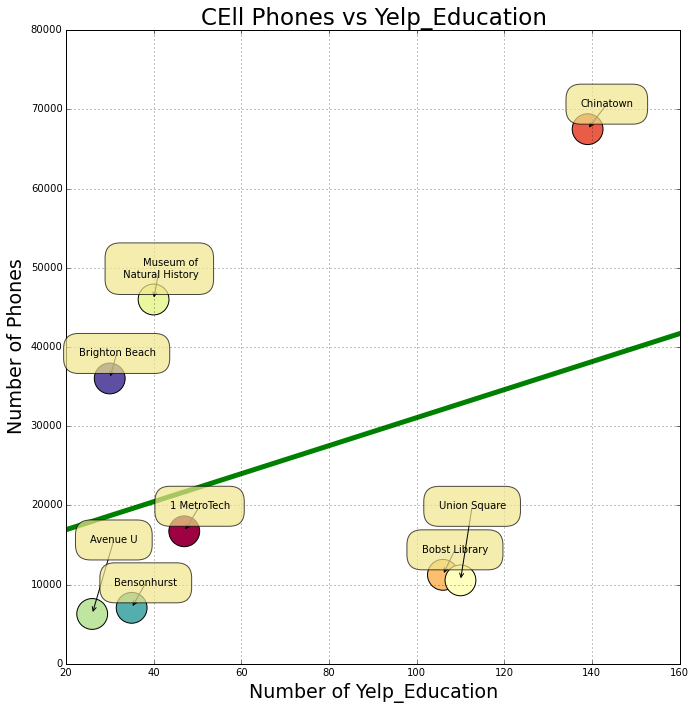

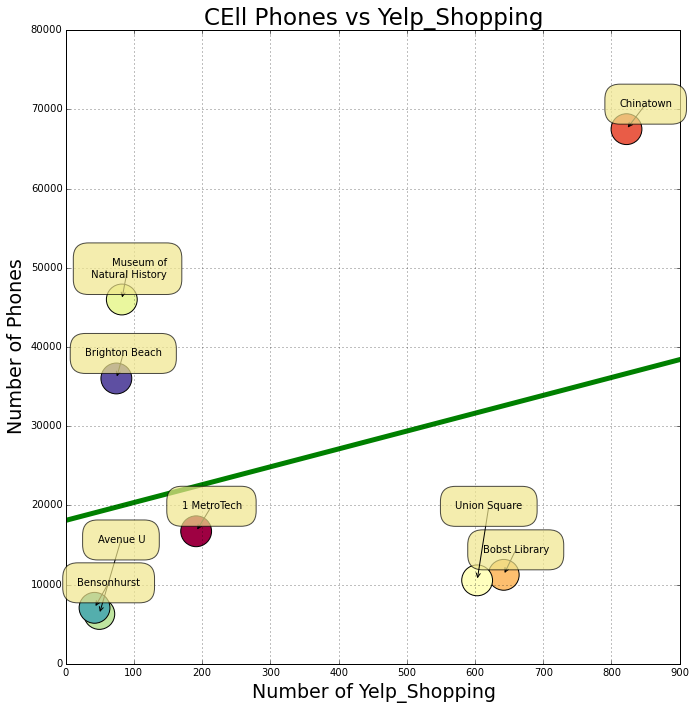

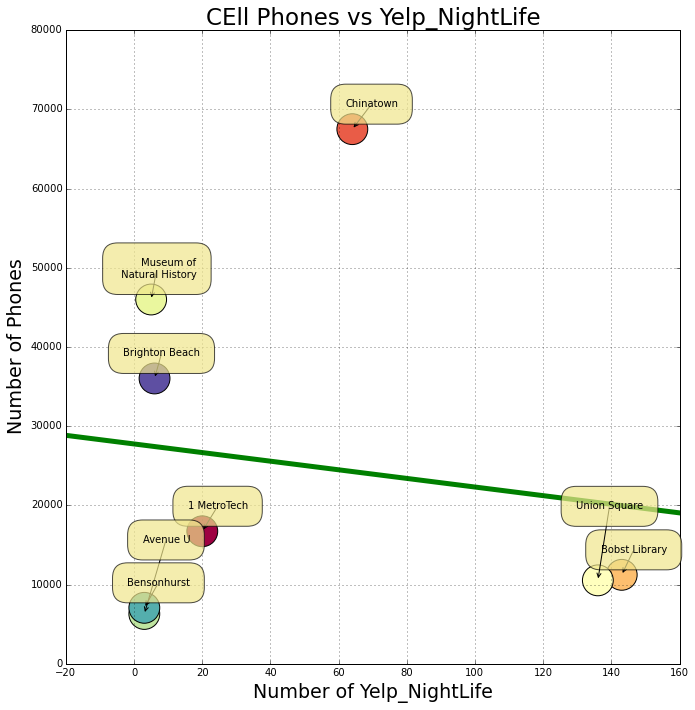

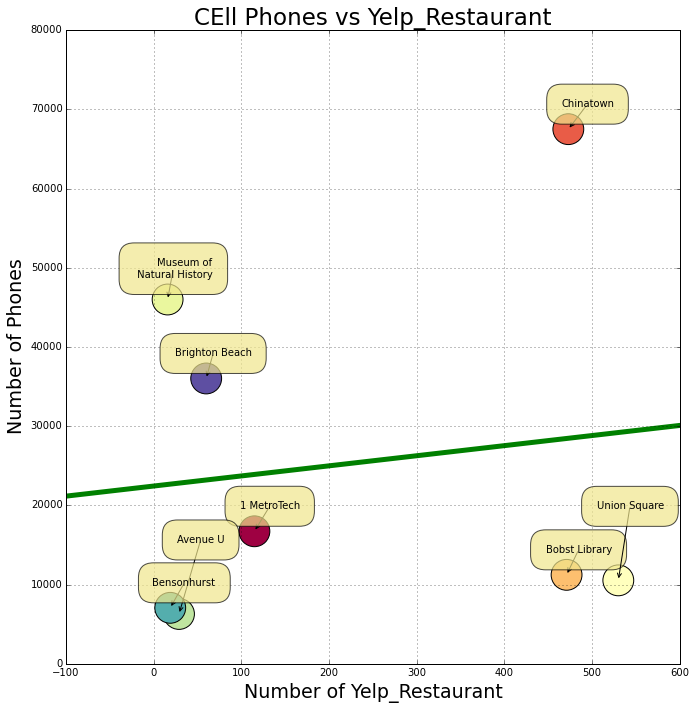

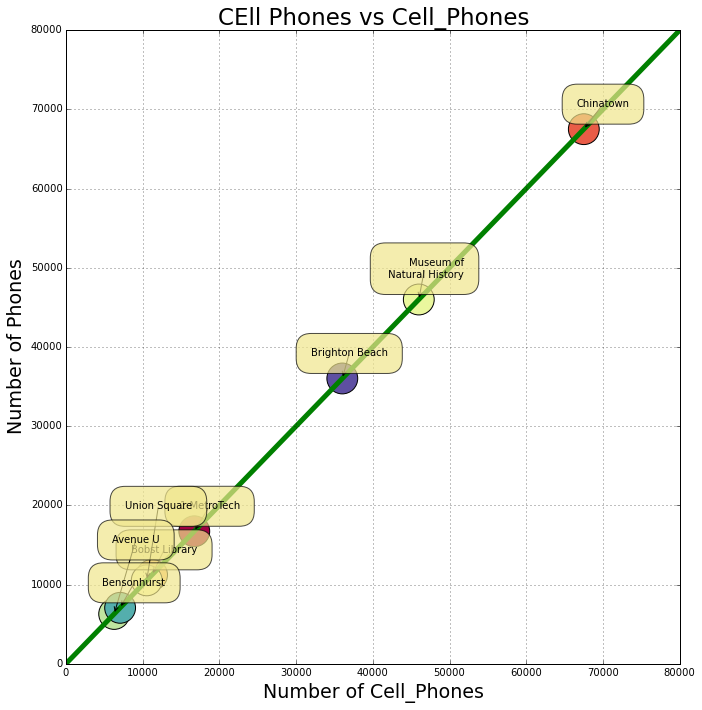

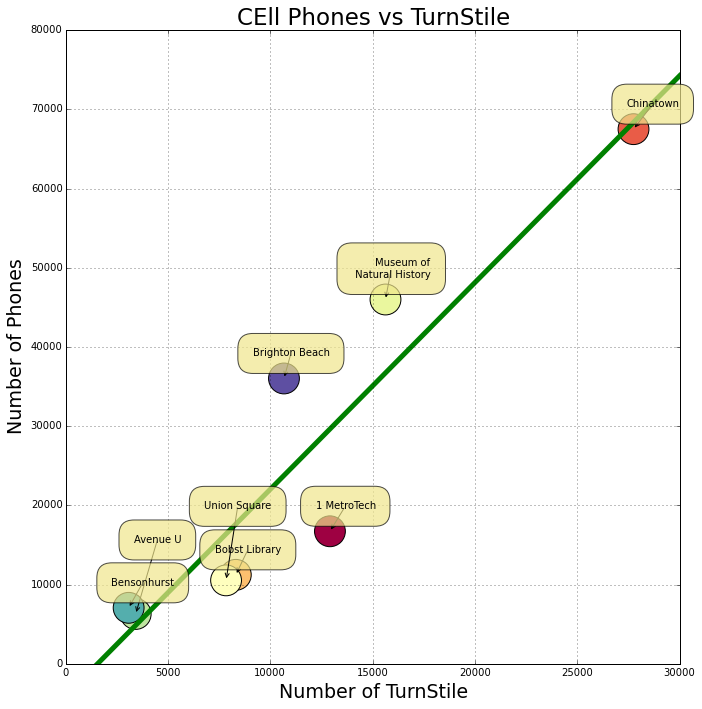

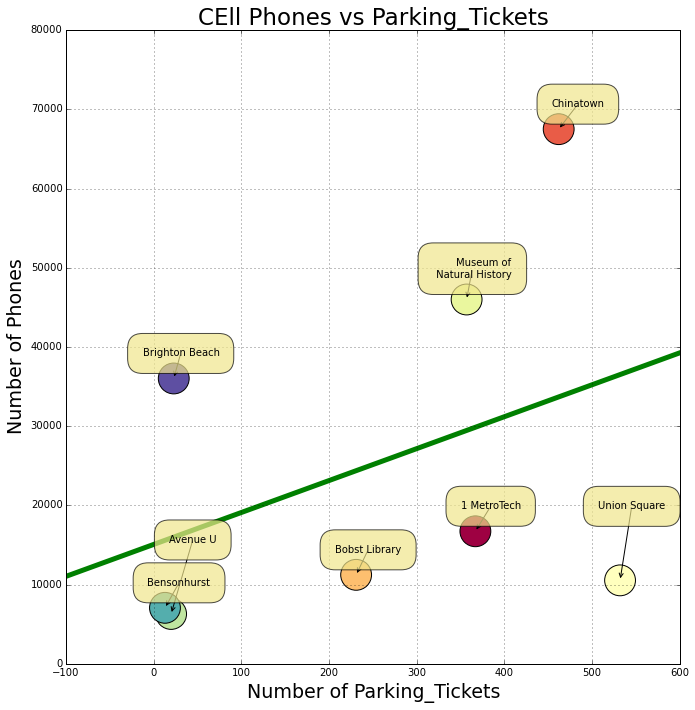

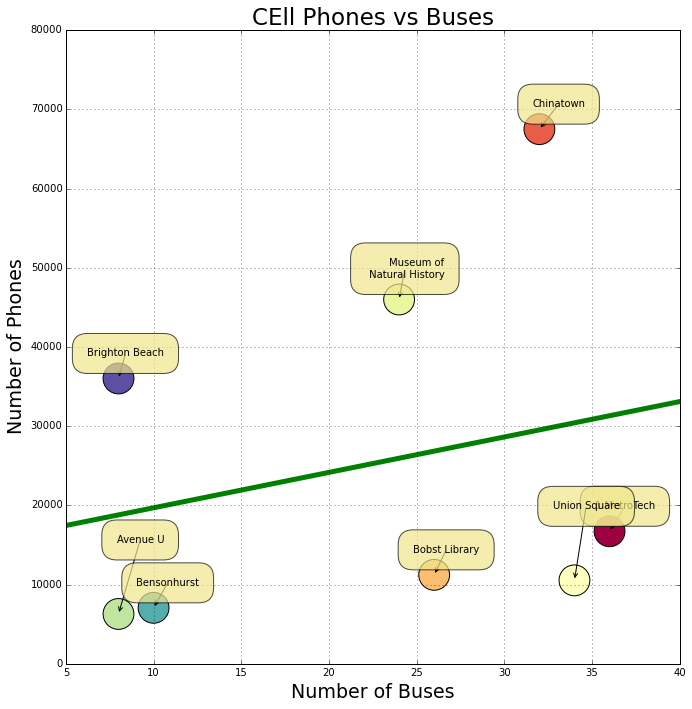

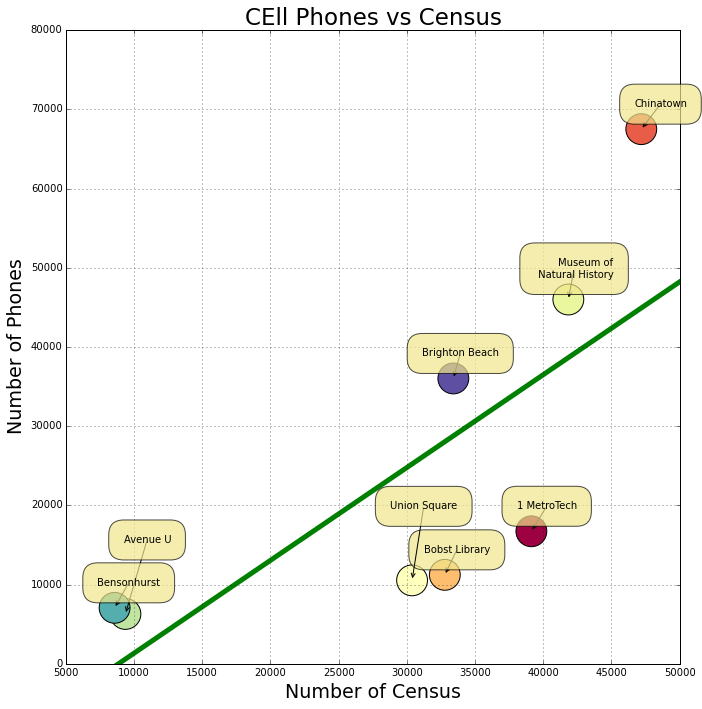

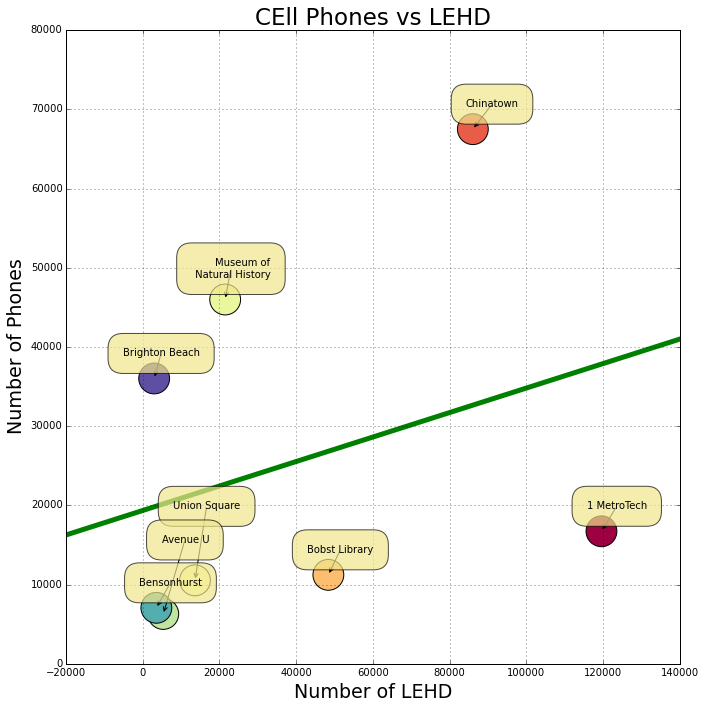

In [8]:
labels = names
col = [1, 3, 5, 7, 8, 9, 11, 13]
hight = [0, 0, 0, 49, 0, 49, 0, 0]

for n in data.columns:    
    fig, ax = plt.subplots(figsize=(11,11))
    #ax.scatter(data[n], data['Cell_Phones'])
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(
        data[n], data['Cell_Phones'], marker = 'o', c = col, s = 950,
        cmap = plt.get_cmap('Spectral'))
    
    model = sm.ols(formula='Cell_Phones ~ ' + n, data = data).fit()
    abline_plot(model_results=model, ax=ax, color='green', linewidth = 5)

    ax.set_title('CEll Phones vs ' + n, fontsize = 23)
    ax.set_ylabel('Number of Phones', fontsize = 19)
    ax.set_xlabel('Number of ' + n, fontsize = 19)
    
    print "Intercept (alpha) = ", model.params[0], ", t score for intercept (alpha) = ", model.tvalues[0]
    print "Slope = (beta)", model.params[1], ", t score for slope (beta) = ", model.tvalues[1]

    print '\nMODEL ' + n + '\n'
    print(model.summary())
    
    plt.grid()
    i = 0
    for label, x, y in zip(labels, data[n], data['Cell_Phones']):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (45, 20 + hight[i]),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=1.5', fc = 'khaki', alpha = 0.7),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        i = i + 1


## Final model

In [9]:
model = sm.ols(formula=
               'Cell_Phones ~ Tweets + TurnStile + Census', data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Cell_Phones   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     11.87
Date:                Mon, 14 Mar 2016   Prob (F-statistic):             0.0185
Time:                        02:51:51   Log-Likelihood:                -81.776
No. Observations:                   8   AIC:                             171.6
Df Residuals:                       4   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1281.3293   8726.817     -0.147      0.8